In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"..\data\raw\testing\graham\GalaxySample.txt", sep="\t+", lineterminator='\r')

<ipython-input-1-8122e275efc5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r"..\data\raw\testing\graham\GalaxySample.txt", sep="\t+", lineterminator='\r')


In [2]:
df

,Galaxy,Type,Core
0,A1836 BCG,E1-2,yes
1,A3565 BCG,E1,no
2,NGC 0307,SAB0,no
3,NGC 0404,S0,no
4,NGC 0524,SA0(rs),yes
5,NGC 1194,S0,no
6,NGC 1275,E,no
7,NGC 1374,S0,no?
8,NGC 1407,E,yes
9,NGC 1550,E1,yes


In [3]:
#E = df[df["Type"] == "E"]; ES = df[df["Type"] == "ES"]

In [4]:
mask = df["Type"].str.contains('E\d', na=True)
E = df[mask].copy()

In [5]:
mask = df["Type"].str.contains('ES', na=True)
ES = df[mask].copy()

In [6]:
E.reset_index(inplace=True, drop=True)
E

,Galaxy,Type,Core
0,A1836 BCG,E1-2,yes
1,A3565 BCG,E1,no
2,NGC 1550,E1,yes
3,NGC 1600,E3,yes
4,NGC 3923,E4,yes
5,NGC 4486B,E1,no
6,NGC 4649,E2,yes
7,NGC 5328,E1,yes
8,NGC 5419,E2-3,yes
9,NGC 5516,E1-2,yes?


In [7]:
ES.reset_index(inplace=True, drop=True)
ES

,Galaxy,Type,Core
0,NGC 4342,ES/S0,no
1,NGC 5845,ES,no
2,NGC 6861,ES,no


In [8]:
def download_SDSS_imgcutouts(df):
    import requests
    import PIL as pil
    from PIL import Image
    from PIL import ImageOps
    import io
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    df['image_data'] = None
    df['ra'] = None
    df['dec'] = None
    for row_index in df.index:
        row = df.loc[row_index]
        
        name = row["Galaxy"]
        
        try:
            skycoord = SkyCoord.from_name(name)
            df.at[row_index, "ra"] = skycoord.ra.degree
            df.at[row_index, "dec"] = skycoord.dec.degree
            ra = row["ra"]
            dec = row["dec"]
        except:
            print("Dropped: " + row["Galaxy"])
            df.drop(index=row_index, axis=0, inplace=True)
        else:
            url = r"https://archive.eso.org/dss/dss/image?ra=&dec=&equinox=J2000&name="+ str(name) + "&x=5&y=5&Sky-Survey=DSS1&mime-type=download-gif&statsmode=WEBFORM"

            res = requests.get(url, timeout=60)

            img = Image.open(io.BytesIO(res.content))
            img = ImageOps.grayscale(img)
            img = img.resize((50, 50))
            np_arr = np.array(img)
            np_arr = (np_arr - np.min(np_arr)) / (np.max(np_arr) - np.min(np_arr))
            df.at[row_index, 'image_data'] = np_arr
        



In [9]:
download_SDSS_imgcutouts(E)
download_SDSS_imgcutouts(ES)

Dropped: A1836 BCG
Dropped: A3565 BCG


In [10]:
E_image_data = E['image_data'].to_numpy()
for index in range(E_image_data.shape[0]):
    E_image_data[index] = E_image_data[index].ravel()
    
E_image_data = np.concatenate(E_image_data)
np.savetxt('E_graham_image_data.txt', E_image_data)

In [11]:
E_metadata = E.drop('image_data', axis=1)
E_metadata.to_csv('E_graham_metadata.txt')

In [12]:
ES_image_data = ES['image_data'].to_numpy()
for index in range(ES_image_data.shape[0]):
    ES_image_data[index] = ES_image_data[index].ravel()
    
ES_image_data = np.concatenate(ES_image_data)
np.savetxt('ES_graham_image_data.txt', ES_image_data)

In [13]:
ES_metadata = ES.drop('image_data', axis=1)
ES_metadata.to_csv('ES_graham_metadata.txt')

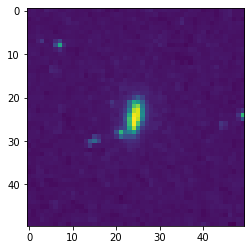

In [14]:
from matplotlib import pyplot as plt
ES_image_data = ES_image_data.reshape([-1, 50, 50, 1])
plt.imshow(ES_image_data[0])

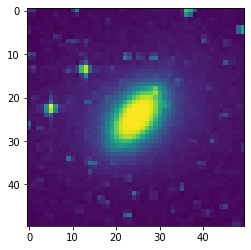

In [15]:
for i in range(ES_image_data.shape[0]):
    plt.imshow(ES_image_data[i]) 

In [16]:
from matplotlib import pyplot as plt
E_image_data = E_image_data.reshape([-1, 50, 50, 1])

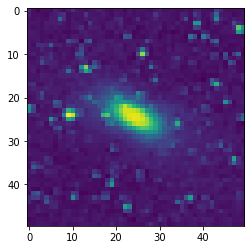

In [17]:
for i in range(E_image_data.shape[0]):
    plt.imshow(E_image_data[i]) 